In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dataset = pd.read_csv("restaurant.csv")

In [18]:
dataset.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [9]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [41]:
dataset['useful'].value_counts()

0      6059
1      1962
2       881
3       484
4       287
5       163
6       127
7        87
8        62
9        58
10       33
12       32
15       21
11       21
13       19
16       16
14       14
17       10
18        9
19        8
26        5
20        5
21        4
22        4
34        3
27        3
30        2
24        2
29        2
25        2
31        2
49        2
39        2
74        2
35        2
23        1
38        1
47        1
46        1
95        1
61        1
59        1
45        1
37        1
36        1
171       1
155       1
75        1
51        1
58        1
50        1
57        1
41        1
176       1
72        1
32        1
135       1
Name: useful, dtype: int64

In [21]:
review = dataset['text'].loc[1]
review

'"A feast worthy of Gods"\n\nBaccarnal Buffet in Caesar Palace is consider the best buffet in the Las Vegas by most food critics   It rated highest in trip advisor and yelp for a buffet restaurant in Vegas.  I was only going to eat Buffet once in this trip, so I decided must try the best there is available.  My review is based on late breakfast and lunch during a non-holiday weekday.  Finding this place is confusing and take more than five minutes from the main entrance to get here, this is common in most buffet in the strip.  \n\nAdmission Price\n*Breakfast (Monday - Friday, 7 a.m. - 11 a.m.): $25.99\n*Brunch (Saturday - Sunday, 8 a.m. - 3 p.m.): $40.99\n* Lunch (Monday - Friday, 11 a.m. - 3 p.m.): $32.99\n* Dinner (Daily, 3 p.m. - 10 p.m.): $45.99 on weekdays, $50.99 on weekends \n* Holiday expect to paid $10 more.\n* Total Reward Card Holder gets $1 off.\n* Price not included the 8.1% sales tax.\n\nAtmosphere\nThe interior is similar to those of mid-level restaurant, they claim it c

In [22]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'"A feast worthy of Gods"\n\nBaccarnal Buffet in Caesar Palace is consider the best buffet in the Las Vegas by most food critics   It rated highest in trip advisor and yelp for a buffet restaurant in Vegas.  I was only going to eat Buffet once in this trip, so I decided must try the best there is available.  My review is based on late breakfast and lunch during a non-holiday weekday.  Finding this place is confusing and take more than five minutes from the main entrance to get here, this is common in most buffet in the strip.  \n\nAdmission Price\n*Breakfast (Monday - Friday, 7 a.m. - 11 a.m.): $25.99\n*Brunch (Saturday - Sunday, 8 a.m. - 3 p.m.): $40.99\n* Lunch (Monday - Friday, 11 a.m. - 3 p.m.): $32.99\n* Dinner (Daily, 3 p.m. - 10 p.m.): $45.99 on weekdays, $50.99 on weekends \n* Holiday expect to paid $10 more.\n* Total Reward Card Holder gets $1 off.\n* Price not included the 8.1% sales tax.\n\nAtmosphere\nThe interior is similar to those of mid-level restaurant, they claim it c

In [23]:
import re

review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

' A feast worthy of Gods   Baccarnal Buffet in Caesar Palace is consider the best buffet in the Las Vegas by most food critics   It rated highest in trip advisor and yelp for a buffet restaurant in Vegas   I was only going to eat Buffet once in this trip  so I decided must try the best there is available   My review is based on late breakfast and lunch during a non holiday weekday   Finding this place is confusing and take more than five minutes from the main entrance to get here  this is common in most buffet in the strip     Admission Price  Breakfast  Monday   Friday    a m       a m            Brunch  Saturday   Sunday    a m      p m             Lunch  Monday   Friday     a m      p m             Dinner  Daily    p m       p m           on weekdays         on weekends    Holiday expect to paid     more    Total Reward Card Holder gets    off    Price not included the      sales tax   Atmosphere The interior is similar to those of mid level restaurant  they claim it cost    million

In [24]:
review = review.lower()
review

' a feast worthy of gods   baccarnal buffet in caesar palace is consider the best buffet in the las vegas by most food critics   it rated highest in trip advisor and yelp for a buffet restaurant in vegas   i was only going to eat buffet once in this trip  so i decided must try the best there is available   my review is based on late breakfast and lunch during a non holiday weekday   finding this place is confusing and take more than five minutes from the main entrance to get here  this is common in most buffet in the strip     admission price  breakfast  monday   friday    a m       a m            brunch  saturday   sunday    a m      p m             lunch  monday   friday     a m      p m             dinner  daily    p m       p m           on weekdays         on weekends    holiday expect to paid     more    total reward card holder gets    off    price not included the      sales tax   atmosphere the interior is similar to those of mid level restaurant  they claim it cost    million

In [25]:
review = review.split()
review

['a',
 'feast',
 'worthy',
 'of',
 'gods',
 'baccarnal',
 'buffet',
 'in',
 'caesar',
 'palace',
 'is',
 'consider',
 'the',
 'best',
 'buffet',
 'in',
 'the',
 'las',
 'vegas',
 'by',
 'most',
 'food',
 'critics',
 'it',
 'rated',
 'highest',
 'in',
 'trip',
 'advisor',
 'and',
 'yelp',
 'for',
 'a',
 'buffet',
 'restaurant',
 'in',
 'vegas',
 'i',
 'was',
 'only',
 'going',
 'to',
 'eat',
 'buffet',
 'once',
 'in',
 'this',
 'trip',
 'so',
 'i',
 'decided',
 'must',
 'try',
 'the',
 'best',
 'there',
 'is',
 'available',
 'my',
 'review',
 'is',
 'based',
 'on',
 'late',
 'breakfast',
 'and',
 'lunch',
 'during',
 'a',
 'non',
 'holiday',
 'weekday',
 'finding',
 'this',
 'place',
 'is',
 'confusing',
 'and',
 'take',
 'more',
 'than',
 'five',
 'minutes',
 'from',
 'the',
 'main',
 'entrance',
 'to',
 'get',
 'here',
 'this',
 'is',
 'common',
 'in',
 'most',
 'buffet',
 'in',
 'the',
 'strip',
 'admission',
 'price',
 'breakfast',
 'monday',
 'friday',
 'a',
 'm',
 'a',
 'm',
 'bru

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

review = [word for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asere\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['feast',
 'worthy',
 'gods',
 'baccarnal',
 'buffet',
 'caesar',
 'palace',
 'consider',
 'best',
 'buffet',
 'las',
 'vegas',
 'food',
 'critics',
 'rated',
 'highest',
 'trip',
 'advisor',
 'yelp',
 'buffet',
 'restaurant',
 'vegas',
 'going',
 'eat',
 'buffet',
 'trip',
 'decided',
 'must',
 'try',
 'best',
 'available',
 'review',
 'based',
 'late',
 'breakfast',
 'lunch',
 'non',
 'holiday',
 'weekday',
 'finding',
 'place',
 'confusing',
 'take',
 'five',
 'minutes',
 'main',
 'entrance',
 'get',
 'common',
 'buffet',
 'strip',
 'admission',
 'price',
 'breakfast',
 'monday',
 'friday',
 'brunch',
 'saturday',
 'sunday',
 'p',
 'lunch',
 'monday',
 'friday',
 'p',
 'dinner',
 'daily',
 'p',
 'p',
 'weekdays',
 'weekends',
 'holiday',
 'expect',
 'paid',
 'total',
 'reward',
 'card',
 'holder',
 'gets',
 'price',
 'included',
 'sales',
 'tax',
 'atmosphere',
 'interior',
 'similar',
 'mid',
 'level',
 'restaurant',
 'claim',
 'cost',
 'million',
 'might',
 'felt',
 'like',
 'perh

In [27]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['feast',
 'worthi',
 'god',
 'baccarn',
 'buffet',
 'caesar',
 'palac',
 'consid',
 'best',
 'buffet',
 'la',
 'vega',
 'food',
 'critic',
 'rate',
 'highest',
 'trip',
 'advisor',
 'yelp',
 'buffet',
 'restaur',
 'vega',
 'go',
 'eat',
 'buffet',
 'trip',
 'decid',
 'must',
 'tri',
 'best',
 'avail',
 'review',
 'base',
 'late',
 'breakfast',
 'lunch',
 'non',
 'holiday',
 'weekday',
 'find',
 'place',
 'confus',
 'take',
 'five',
 'minut',
 'main',
 'entranc',
 'get',
 'common',
 'buffet',
 'strip',
 'admiss',
 'price',
 'breakfast',
 'monday',
 'friday',
 'brunch',
 'saturday',
 'sunday',
 'p',
 'lunch',
 'monday',
 'friday',
 'p',
 'dinner',
 'daili',
 'p',
 'p',
 'weekday',
 'weekend',
 'holiday',
 'expect',
 'paid',
 'total',
 'reward',
 'card',
 'holder',
 'get',
 'price',
 'includ',
 'sale',
 'tax',
 'atmospher',
 'interior',
 'similar',
 'mid',
 'level',
 'restaur',
 'claim',
 'cost',
 'million',
 'might',
 'felt',
 'like',
 'perhap',
 'includ',
 'equip',
 'kitchen',
 'tool',

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk 
nltk.download('wordnet')

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asere\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


['feast',
 'worthy',
 'god',
 'baccarnal',
 'buffet',
 'caesar',
 'palace',
 'consider',
 'best',
 'buffet',
 'la',
 'vega',
 'food',
 'critic',
 'rated',
 'highest',
 'trip',
 'advisor',
 'yelp',
 'buffet',
 'restaurant',
 'vega',
 'going',
 'eat',
 'buffet',
 'trip',
 'decided',
 'must',
 'try',
 'best',
 'available',
 'review',
 'based',
 'late',
 'breakfast',
 'lunch',
 'non',
 'holiday',
 'weekday',
 'finding',
 'place',
 'confusing',
 'take',
 'five',
 'minute',
 'main',
 'entrance',
 'get',
 'common',
 'buffet',
 'strip',
 'admission',
 'price',
 'breakfast',
 'monday',
 'friday',
 'brunch',
 'saturday',
 'sunday',
 'p',
 'lunch',
 'monday',
 'friday',
 'p',
 'dinner',
 'daily',
 'p',
 'p',
 'weekday',
 'weekend',
 'holiday',
 'expect',
 'paid',
 'total',
 'reward',
 'card',
 'holder',
 'get',
 'price',
 'included',
 'sale',
 'tax',
 'atmosphere',
 'interior',
 'similar',
 'mid',
 'level',
 'restaurant',
 'claim',
 'cost',
 'million',
 'might',
 'felt',
 'like',
 'perhaps',
 'in

In [30]:
review = ' '.join(review)
review

'feast worthy god baccarnal buffet caesar palace consider best buffet la vega food critic rated highest trip advisor yelp buffet restaurant vega going eat buffet trip decided must try best available review based late breakfast lunch non holiday weekday finding place confusing take five minute main entrance get common buffet strip admission price breakfast monday friday brunch saturday sunday p lunch monday friday p dinner daily p p weekday weekend holiday expect paid total reward card holder get price included sale tax atmosphere interior similar mid level restaurant claim cost million might felt like perhaps included equipment kitchen tool cost lot seating count mean anything dinner weekend get full quick dessert section separate counter rest food customer service got assign individual server first helpful quickly kind forgot table weekday lunch busy still several table empty imagine dinner weekend service might worst nicest thing enforce hour eating time limit normally busy time peak

In [51]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


In [52]:
yelp=pd.read_csv("restaurant.csv")

In [53]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [54]:
yelp_best_worst=yelp[(yelp.stars==5)|(yelp.stars==1)]
yelp_best_worst.reset_index(drop=True, inplace=True)
x=yelp_best_worst.text
y=yelp_best_worst.stars
print (x.shape)
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42)

(5303,)


In [55]:
yelp.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [56]:
print(x)

0       After getting food poisoning at the Palms hote...
1       Not worth it! Too salty food and expensive! Th...
2       I would give this infinite stars if I could. M...
3       Really enjoyed everything they had to offer. I...
4       Lots of choices. Good service. Line wasn't as ...
                              ...                        
5298    We went to Bacchanal on Easter Sunday as it wa...
5299    Came him from LA! Thanksgiving Week. We decide...
5300    Every time we visit Las Vegas we go to this bu...
5301    Best buffet ever! Irma was great, served us be...
5302    The selection is amazing and all the food is e...
Name: text, Length: 5303, dtype: object


In [57]:
vect=CountVectorizer(lowercase=True, stop_words="english",)
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 8697)	1
  (0, 5664)	1
  (0, 1720)	2
  (0, 9469)	1
  (0, 3962)	1
  (0, 10228)	1
  (0, 2723)	1
  (0, 6338)	1
  (0, 997)	2
  (0, 8147)	1
  (0, 9307)	1
  (0, 105)	1
  (0, 6828)	1
  (0, 3011)	1
  (0, 11516)	1
  (0, 4503)	1
  (0, 8162)	1
  (0, 10464)	1
  (0, 4118)	1
  (0, 3047)	1
  (0, 11898)	1
  (0, 8349)	1
  (0, 317)	1
  (1, 11898)	1
  (1, 8078)	1
  :	:
  (3976, 7284)	1
  (3976, 7378)	1
  (3976, 5208)	1
  (3976, 6389)	1
  (3976, 1162)	1
  (3976, 1703)	1
  (3976, 4505)	2
  (3976, 11099)	1
  (3976, 9987)	1
  (3976, 5709)	1
  (3976, 5093)	1
  (3976, 2836)	1
  (3976, 4089)	1
  (3976, 11775)	1
  (3976, 2755)	1
  (3976, 4860)	1
  (3976, 6543)	1
  (3976, 8030)	1
  (3976, 9726)	1
  (3976, 2217)	1
  (3976, 11780)	1
  (3976, 11281)	1
  (3976, 2818)	1
  (3976, 1377)	1
  (3976, 11573)	1


In [58]:
print(x_test)

530     Great food. They have wide variety of choices....
3527    This buffet was fantastic! Never had anything ...
3165    Went to the Saturday morning bruch buffet.  It...
2395    I don't usually go to buffets but this place w...
79      I have tried many places in Vegas and I think ...
                              ...                        
305     Best buffet in Vegas, hands down! They have ve...
1192    So worth the money.  We ate for 3 hours it was...
4189    Been here every time I'm in Vegas and will con...
2170    Best buffet on the Strip, it's a must! The fla...
1061    Great food all around. Steaks, seafood, Mexica...
Name: text, Length: 1326, dtype: object


In [59]:
tf=pd.DataFrame(x_train_dtm.toarray(), columns=vect.get_feature_names())
tf.head()

,00,000,00am,00pm,01,03am,04,04pm,05,05am,...,目の前で作ってくれるクレープなども,私は,羊排叉烧披萨提拉米苏布丁每一样都想说,美味しさ,肯定是请来了全球最地道的大厨吧,萝卜干都是萧山的味道啊,超难吃,连粥和油条都做的地地道道,野菜料理ばかり食べましたが,高いけど
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
x_train.head()

843     Really impressive buffet selection, especially...
4700    This place was great and worth the money.  You...
4274    I wish I could give this place 6-stars. I even...
211     The line was long and we waited for 2 hours bu...
1108    This is the best buffet in Vegas.\nThere will ...
Name: text, dtype: object

In [61]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(3977, 12400)

In [62]:
vect=CountVectorizer(ngram_range=(1,2))
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(3977, 153297)

In [63]:
print(vect.get_feature_names()[-50:])

['好吃', '好吃 服务很好价格也实惠', '好吃好吃', '好吃好吃 x100遍', '好难吃', '好难吃 超难吃', '少しお値段高めですが', '少しお値段高めですが こちらは種類の多さ', '帝王蟹生蚝虾蟹鲜美无比', '帝王蟹生蚝虾蟹鲜美无比 羊排叉烧披萨提拉米苏布丁每一样都想说', '彩りがよく', '彩りがよく みているだけでもワクワクします', '怎么可以这么棒', '怎么可以这么棒 帝王蟹生蚝虾蟹鲜美无比', '慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢啊', '慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢啊 ーー', '日本人にも嬉しいお寿司もあります', '日本人にも嬉しいお寿司もあります さらにデザートはとても充実していて', '服务很好价格也实惠', '服务很好价格也实惠 excellent', '服务很好价格也实惠 好吃', '本当にいろんな種類の食べ物があり', '本当にいろんな種類の食べ物があり とても満足できると思います', '本当に食べ応えのあるバッフェです', '本当に食べ応えのあるバッフェです ラスベガスに行ったら是非行ってもらいたい', '然而才300多一位', '然而才300多一位 甩国内的自助100条街', '特に茹でたカニと', '特に茹でたカニと ステーキ', '甩国内的自助100条街', '目の前で作ってくれるクレープなども', '目の前で作ってくれるクレープなども 本当に食べ応えのあるバッフェです', '私は', '私は 野菜料理ばかり食べましたが', '羊排叉烧披萨提拉米苏布丁每一样都想说', '羊排叉烧披萨提拉米苏布丁每一样都想说 umm', '美味しさ', '美味しさ どれも良かったです', '肯定是请来了全球最地道的大厨吧', '肯定是请来了全球最地道的大厨吧 然而才300多一位', '萝卜干都是萧山的味道啊', '萝卜干都是萧山的味道啊 吃出了泪花', '超难吃', '超难吃 东西不新鲜', '连粥和油条都做的地地道道', '连粥和油条都做的地地道道 萝卜干都是萧山的味道啊', '野菜料理ばかり食べましたが', '野菜料理ばかり食べましたが シーフードも美味しかったと家族が言っていました', '高いけど', '高いけど メチャ

In [64]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

In [65]:
nb=MultinomialNB()
nb.fit(x_train_dtm, y_train)
y_pred_class=nb.predict(x_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.942684766214178


In [66]:
vect=TfidfVectorizer(stop_words="english")
dtm=vect.fit_transform(yelp.text)
features= vect.get_feature_names()
dtm.shape

(10417, 19667)

In [71]:
from wordcloud import WordCloud, STOPWORDS


In [72]:
comment_words = ''
stopwords = set(STOPWORDS)

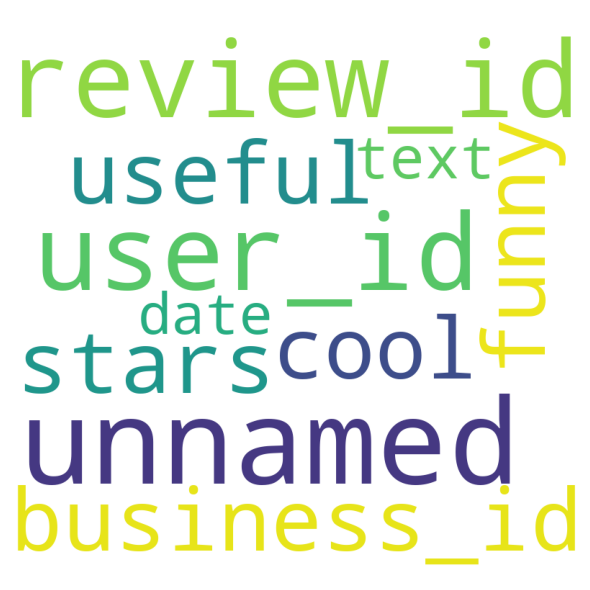

In [75]:
for val in df:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()